In [1]:
from recognition import *
import matplotlib.pyplot as plt
from brute_force import recognize

In [2]:
original = cv2.cvtColor(cv2.imread('original.png'), cv2.COLOR_BGR2RGB)

prediction = recognize(original, True)
walls, doors, windows = prediction['walls'], prediction['doors'], prediction['windows']
walls = attach_openings(walls, doors + windows, False)
walls = normalize_wall_points(walls, 5) # attach first because this might move walls slightly

100%|██████████| 53/53 [00:00<00:00, 219228.91it/s]


In [3]:
toilets = [i for i in prediction['icons'] if i['type'] == 'toilet']
toilets

[{'points': array([[616., 261.],
         [633., 261.],
         [633., 287.],
         [616., 287.]], dtype=float32),
  'type': 'toilet'},
 {'points': array([[ 95., 259.],
         [111., 259.],
         [111., 285.],
         [ 95., 285.]], dtype=float32),
  'type': 'toilet'}]

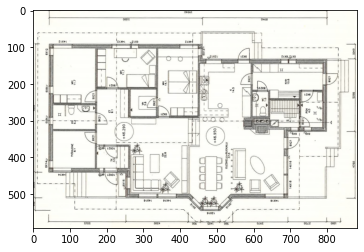

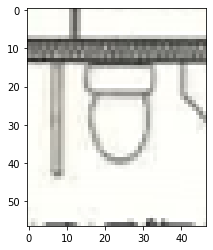

In [10]:
plt.imshow(original)
plt.show()

def crop_toilet(toilet, img, padding=15):
    xx = [p[0] for p in toilet['points']]
    yy = [p[1] for p in toilet['points']]
    min_y, top_x = int(np.min(yy)), int(np.min(xx))
    max_y, bottom_x = int(np.max(yy)), int(np.max(xx))

    cropped = img[min_y-padding:max_y+padding+1, top_x-padding:bottom_x+padding+1]
    return cropped

cropped = crop_toilet(toilets[1], original)
plt.imshow(cropped)
plt.show()

In [11]:
from toilet_classification.model import Model
Model.predict(cropped)

180

# Just call main

In [1]:
from recognition import *
import matplotlib.pyplot as plt

/mnt/c/Users/joaodavid/Desktop/practical/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = main('01_Ground_floor_plan.png')
results

2022-05-04 15:41:31,286 INFO - Performing segmentation
2022-05-04 15:42:15,342 INFO - Simplifying contours
2022-05-04 15:42:16,344 INFO - Converting polygons to walls
2022-05-04 15:43:29,833 INFO - Calculating wall width
100%|██████████| 290/290 [00:00<00:00, 1715582.74it/s]
2022-05-04 15:43:29,852 INFO - Identifying wall openings and associating them with their respective walls
100%|██████████| 290/290 [00:01<00:00, 176.83it/s]
2022-05-04 15:43:31,657 INFO - Classifying doors individually
100%|██████████| 290/290 [00:04<00:00, 64.86it/s] 
2022-05-04 15:43:36,132 INFO - Retrieving icons
2022-05-04 15:43:36,139 INFO - Finished


{'walls': [{'points': array([[  68. , 1391.5],
          [ 168. , 1381.5]], dtype=float32)},
  {'points': array([[  68. , 1391.5],
          [ 168. , 1391.5]], dtype=float32)},
  {'points': array([[  55.75, 1391.5 ],
          [  68.  , 1391.5 ]], dtype=float32)},
  {'points': array([[ 168. , 1391.5],
          [ 168. , 1381.5]], dtype=float32)},
  {'points': array([[ 168. , 1381.5],
          [ 168. , 1310. ]], dtype=float32)},
  {'points': array([[ 168. , 1391.5],
          [ 234. , 1393. ]], dtype=float32),
   'elements': [{'points': array([[ 181. , 1392.5],
            [ 218. , 1392.5]], dtype=float32),
     'type': 'window'}]},
  {'points': array([[1278.5, 1393. ],
          [1279. , 1276.5]], dtype=float32)},
  {'points': array([[1278.5  , 1165.375],
          [1279.   , 1276.5  ]], dtype=float32)},
  {'points': array([[1217.5, 1276.5],
          [1279. , 1276.5]], dtype=float32),
   'elements': [{'points': array([[1237., 1276.],
            [1267., 1276.]], dtype=float32),
     

In [4]:
original = cv2.imread('01_Ground_floor_plan.png')
im = np.full(original.shape, 255).astype(np.uint8)

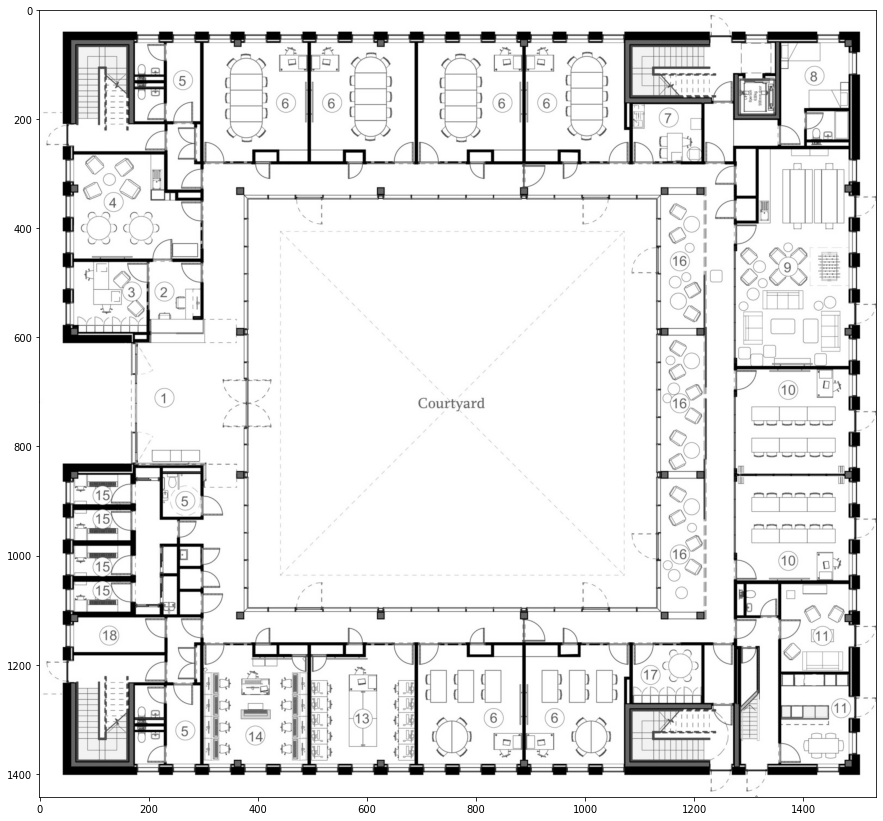

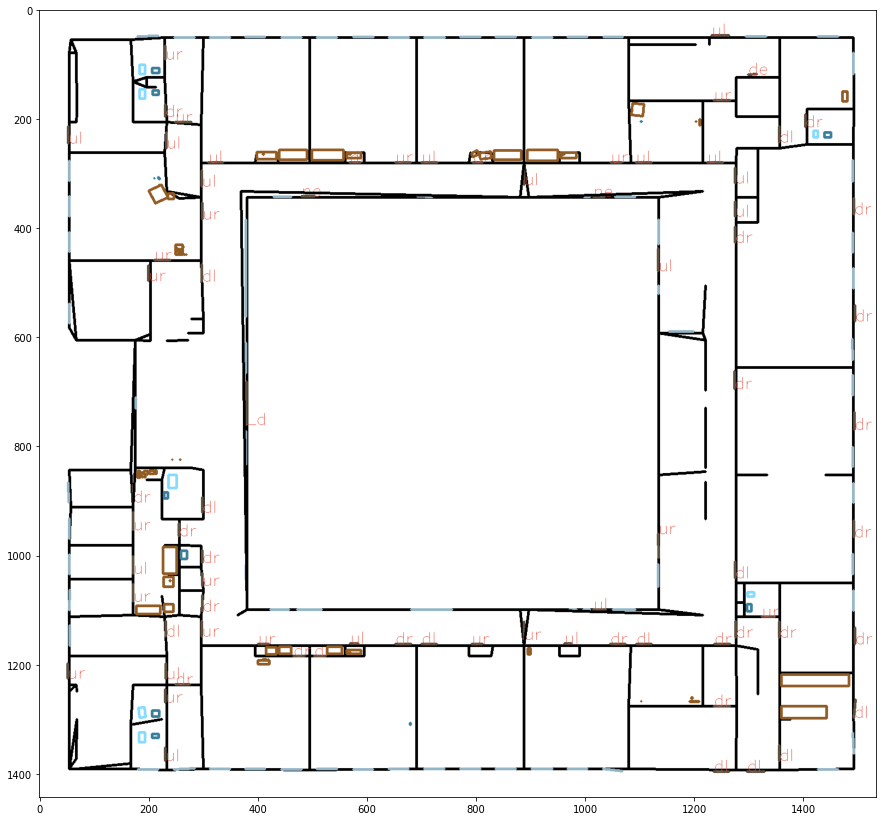

In [5]:
reconstr = im.copy()
for wall in results['walls']:
    s, e = wall['points']
    reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (0, 0, 0), 3)

    if 'elements'  in wall:
        for el in wall['elements']:
            s, e = el['points']
            if el['type'] == 'window':
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (147, 181, 198), 3)
            else:
                reconstr = cv2.line(reconstr, np.intp(s), np.intp(e), (94, 80, 63), 3)
                reconstr = cv2.putText(
                    reconstr, el['type'][-2:],
                    np.intp(s),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (230, 80, 63), 1, 2
                )

icons = ('closet', 'toilet', 'sink', 'bathtub')
colors = ((145, 91, 36), (133, 218, 255),  (58, 126, 156), (201, 30, 173))
for icon in results['icons']:
    # pts = np.intp(icon['points'])
    # print(pts, pts.shape, pts.reshape((-1, 1, 2)))
    reconstr = cv2.drawContours(reconstr, [np.intp(icon['points'])], 0, colors[icons.index(icon['type'])], 3)

plt.figure(figsize=(15, 15))
plt.imshow(original)

plt.figure(figsize=(15, 15))
plt.imshow(reconstr)
plt.show()